# Biodiversity Project

## Introduction

In this project we will be interpreting data from the National Parks Services about endangered species in different parks.

The data files being used `observations.csv` and `species.csv` has been provided by [Codecademy.com](https://www.codecademy.com).

Note: The data for this project is *inspired* by real data, but is mostly fictional.

## Scoping 

When starting a new project, it's a good idea to define its scope. Four parts have been designed to guide the project's development and progress. The first component is the project goals, which outline the project's high-level aims and purposes. The next component is the data; fortunately, data is already supplied in this project, but it must be determined whether the project goals can be satisfied with the data available. Third, the analysis must be well planned, including the methodologies and questions that will be used to achieve the project's objectives. Finally, evaluation will assist us in drawing conclusions and results from our study.

### Project Goals

In this project, the perspective will be that of a biodiversity analyst for the National Parks Service. The National Parks Service seeks to secure the survival of at-risk species and sustain the amount of biodiversity in its parks. As a result, the primary goals of an analyst will be to understand the features of the species and their conservation status, as well as the species' link to national parks. Some questions are posed:

- What is the distribution of `conservation_status` for animals?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which species were spotted the most at each park?

### Data

This project included two data sets with the package. The first `csv` file contains information about each species, while the second has observations of species and park locations. This data will be used to examine the project's goals. 

### Analysis

In this part, descriptive statistics and data visualization techniques will be used to better comprehend the data. Statistical inference will also be applied to determine if the observed values are statistically significant. Some of the major metrics that will be calculated are: 

1. Counts
1. Distributions
1. Relationship between Species
1. `conservation_status` of Species
1. Observations of Species in Parks.

### Evaluation

Finally, it is a good idea to read over the objectives again and see if the analysis output matches to the questions that were originally established to be addressed (in the goals section). This part will also reflect on what was discovered during the process and whether any of the questions could not be addressed. This might also include limits or if the analysis could have been conducted using alternate approaches.

## Importing Python Modules

We will first begin with importing the required modules that will be used in this project:

In [3]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

## Loading the Data

The next steps for us would be to load the provided data for us to continue analysing further. We will glimpse adn check their contents using the `.head()` method.

#### Species

`species_info.csv` contains information about the different species in the National Parks. The dataset consists of 4 columns namely:

- **category** - class of animal
- **scientific_name** - the scientifc name of each species
- **common_name** - the common names of each species
- **conservation_status** - each species' current conservation status

In [4]:
species = pd.read_csv('species_info.csv', encoding='utf-8')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


#### Observations

`observations.csv` contains information about the different species throughout the national parks over the past 7 days from the recorded sightings. The dataset consists of 3 columns namely:

- **scientific_name** - the scientific name of each species
- **park_name** - park where species were found
- **observations** - the number of times each species was observed at park

In [5]:
observations = pd.read_csv('observations.csv', encoding='utf-8')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


#### Data Characteristics

Next we will check the sizes of both of the files `species_info.csv` and `observations.csv`

In [6]:
species_shape = species.shape
observations_shape = observations.shape

In [7]:
print(f"Species shape: {species_shape}")
print(f"Observations shape: {observations_shape}")

Species shape: (5824, 4)
Observations shape: (23296, 3)


From above we can see that `species_info.csv` consists of 5,824 rows and 4 columns. 

`observations.csv` consists of 23,296 rows and 3 columns.

### Exploring the Data

We will first be exploring the data of `species` in depth. We will start by getting the number of unique species available in the national parks.

In [9]:
unique_sn = species.scientific_name.nunique()
print(f"Number of Species: {unique_sn}")

Number of Species: 5541


We used the `scientific_name` column from the data provided to find the value of 5,541 unique species above.

Next we find the total number of categories available and print out the names of the categories.

In [10]:
unique_category = species.category.nunique()
category_names = species.category.unique()

In [11]:
print(f"Number of Categories: {unique_category}")
print(f"Categories: {category_names}")

Number of Categories: 7
Categories: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


We can now count how many times each `category` has been displayed in the data.

In [12]:
species.groupby('category').size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

From the data displayed above we can see that Vascular Plant has the most counts by far with a value of 4,470 whereas Reptiles has the fewest mentions with a count of 79.

Next we will explore the `conservation_status` column as by glimpsing above we can't exactly know which categories are available within that cloumn and their number of appaearances and so on.

In [13]:
statuses_number = species.conservation_status.nunique()
statuses = species.conservation_status.unique()

In [14]:
print(f"Number of Conservation Statuses: {statuses_number}")
print(f"Unique Conservation Statuses: {statuses}")

Number of Conservation Statuses: 4
Unique Conservation Statuses: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


From the above we cans ee that the `conservation_status` consists of 4 categories and `nan` values as well.

We will now explore further in to the same column to get the exact number of each categories and analyze the findings.

In [15]:
print(f"NaN Values: {species.conservation_status.isna().sum()}")

print(species.groupby('conservation_status').size())

NaN Values: 5633
conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64


From the information gathered above we can see that there are 16 `Endangered` Species, 4 `In Recovery`, 161 `Species of Concern` and 10 `Threatened`. There are 5,633 NaN values as well, which suggests that there are 5,633 species without any concerns or it could also mean that the data is absent since they are not under any conservation status.

Now we will head over to the `observations` file to explore the data in depth. Firstly, we have to check the number of parks in the dataset and print them out.

In [17]:
park_number = observations.park_name.nunique()
park_names = observations.park_name.unique()

In [18]:
print(f"Number of Parks: {park_number}")
print(f"Unique Parks: {park_names}")

Number of Parks: 4
Unique Parks: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


From the data printed above, we can see that there are 4 parks in the dataset.

Now we will find the total number of observations that were logged in over the past 7 days.

In [19]:
print(f"Number of Observations: {observations.observations.sum()}")

Number of Observations: 3314739


## Analysis

In this portion, we will analyze the data that we investigated in the previous section. To do this, we must first clean and refine our data. We may begin with the conservation status column, where we found many `NaN values` that we would now modify to `No Intervention`. The conservation status is divided into the following categories:

- `Species of Concern`: declining or appear to be in need of conservation
- `Threatened`: vulnerable to endangerment in the near future
- `Endangered`: seriously at risk of extinction
- `In Recovery`: formerly `Endangered`, but currently neither in danger of extinction throughout all or a significant portion of its range

In [20]:
species.fillna('No Intervention', inplace=True)
species.groupby('conservation_status').size()

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64

We then move on to examine the categories in the `conservation_status` column, except for the ones that do not need an intervention. Below we will display a table and chart to examine further.

In [32]:
filtered_species_data = species[species.conservation_status != 'No Intervention']

grouped_species_data = filtered_species_data.groupby(['conservation_status', 'category'])

counted_species_data = grouped_species_data['scientific_name'].count()

conservation_category = counted_species_data.unstack()

conservation_category

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


From the table above, we can see that there are 7 mammals and 4 birds among the `Endangered` status. In the `In Recovery` status we have 3 birds and 1 mammal, which might indicate that the birds are recovering faster than the mammals.

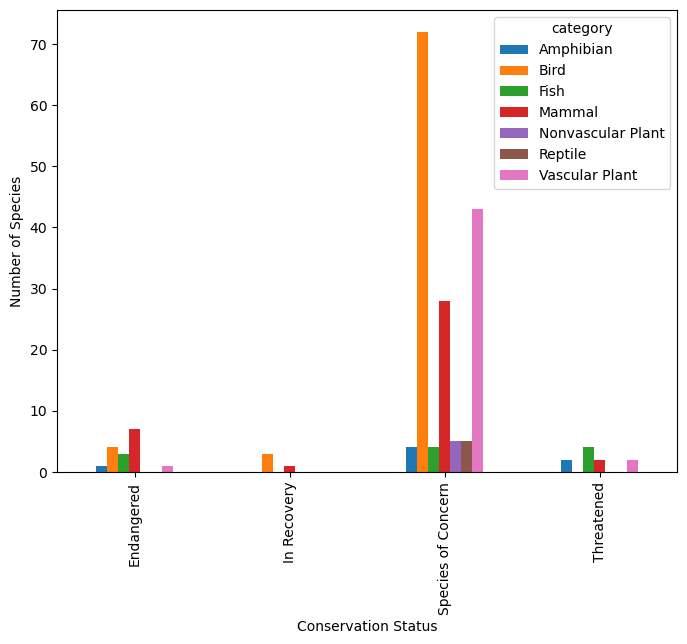

In [30]:
graph = conservation_category.plot(kind = 'bar', figsize=(8,6))

graph.set_xlabel('Conservation Status')
graph.set_ylabel('Number of Species');

#### Species in Conservation

We can now move on to answer the next question of whether there are other certain type of species that are more prone to be `Endangered`. We therefore have to create a new column `is_protected` and include all the species except the ones with `No Intervention`.

In [31]:
species['is_protected'] = species.conservation_status != 'No Intervention'

After creating the new column, we then have to group by `category` and the new column to show the detailed break down of individual species type and their statuses. 

In [33]:
grouped_species = species.groupby(['category', 'is_protected'])

unique_species_counts = grouped_species.scientific_name.nunique()

reset_species_counts = unique_species_counts.reset_index()

pivoted_species_counts = reset_species_counts.pivot(columns='is_protected', index='category', values='scientific_name')

reset_pivoted_species_counts = pivoted_species_counts.reset_index()

category_counts = reset_pivoted_species_counts.copy()

category_counts.columns = ['category', 'not_protected', 'protected']

category_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


Now we will add another column to the table above which will show us the protection percentage.

In [34]:
total_species = category_counts.protected + category_counts.not_protected

percentage_protected = (category_counts.protected / total_species) * 100

category_counts['percent_protected'] = percentage_protected

category_counts

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


#### Test Statistic

In this part of the project, we will find some statistics by using chi-squared tests. This is for us to see whether the different species have statistical significant differences in their conservation status. To begin, we first need a table looking like the one displayed below:

||protected|not protected|
|-|-|-|
|Mammal|?|?|
|Bird|?|?|

We will name the first test as `contingency1` and need to fill in the correct values for mammals and birds.

In [38]:
from scipy.stats import chi2_contingency

contingency1 = [[30, 146], [75, 413]]

chi2_contingency(contingency1)

Chi2ContingencyResult(statistic=0.1617014831654557, pvalue=0.6875948096661336, dof=1, expected_freq=array([[ 27.8313253, 148.1686747],
       [ 77.1686747, 410.8313253]]))

The test carried about above was between `Mammal` and `Bird`. We obtained a p-value of 0.69. The significance level for this test is 0.05. Therefore, we can see that 0.69 is greater than 0.05. Hence, in this case there doesn't seem to be any significant relationship between the two species.

Now we will compare between `Reptile` and `Mammal`. The format of the table is the same as the one displayed above with a slight difference displayed below:

||protected|not protected|
|-|-|-|
|Mammal|?|?|
|Reptile|?|?|

We will name this test as `contingency2` and need to fill in the correct values for mammals and reptiles.

In [39]:
contingency2 = [[30, 146], [5, 73]]

chi2_contingency(contingency2)

Chi2ContingencyResult(statistic=4.289183096203645, pvalue=0.03835559022969898, dof=1, expected_freq=array([[ 24.2519685, 151.7480315],
       [ 10.7480315,  67.2519685]]))

From the second test carried about above, we get the p-value as 0.038 which is less than 0.05 of our significance level. This tells us that there is a statistical difference between reptile and mammal. It tells us that Mammals have statistically significant higher rate for protection needed than Reptiles do.

#### Different Species in Different Parks

The next part, we will be analysing the data provided by the conservationists as they have recorded the sightings of the different species at different parks over the past 7 days. We first need to split the data into individual names after getting the most `common_names` of the `species` from the dataset.

In [40]:
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

mammal_species = species[species.category == 'Mammal']

no_punct_names = mammal_species.common_names.apply(remove_punctuations)

split_names = no_punct_names.str.split()

common_Names = split_names.tolist()

common_Names[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

We now have to remove the duplicates as we only need to count them once per species.

In [41]:
updateRows = []

for i in common_Names:
    i = list(dict.fromkeys(i))
    updateRows.append(i)
    
updateRows[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison'],
 ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]